In [1]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils

In [3]:
img_width=64; img_height=64
IMG_PATH = "D:/UNIR/TFM/VenusDenoise/dataset/cases/64/0100_1000/"
TRAIN_CLASSES_PATH = "D:/UNIR/TFM/VenusDenoise/out_tests/0100_1000-64-train7.csv"
VALID_CLASSES_PATH = "D:/UNIR/TFM/VenusDenoise/out_tests/train_classes/0100_1000-64-7.csv"

batch_size=16
class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

In [25]:
train_files, train_classes, train_images = \
        dsutils.readDatasetClassification(IMG_PATH, img_width, img_height, radiance_limits, TRAIN_CLASSES_PATH)



Read dataset. Path: D:/UNIR/TFM/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8738
Nitid files:8738


In [26]:
val_files, val_classes, val_images = \
    dsutils.readDatasetClassification(IMG_PATH + "validation/", img_width, img_height, radiance_limits, VALID_CLASSES_PATH)


Read dataset. Path: D:/UNIR/TFM/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2208
Nitid files:2208


In [28]:
train_images = np.reshape(train_images, (len(train_images), img_height, img_width, 1))  
val_images= np.reshape(val_images, (len(val_images), img_height, img_width, 1))  

#train_classes = train_classes.squeeze()
#valid_classes = valid_classes.squeeze()

train_classes= np.reshape(train_classes, (len(train_classes), 1))  
val_classes= np.reshape(val_classes, (len(val_classes), 1))  

In [41]:
train_classes = tf.keras.utils.to_categorical( train_classes, num_classes=None, dtype='float32')
val_classes = tf.keras.utils.to_categorical( val_classes, num_classes=None, dtype='float32')

In [45]:
train_classes.shape


(8738, 4)

In [46]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)), 
    Conv2D(32, (3, 3), activation='relu'), 
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 58, 58, 64)        18496     
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 128)      

In [47]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [48]:
hist = model.fit(train_images, train_classes, 
                        epochs=20,
                        batch_size=16, 
                        verbose=1, 
                        validation_data=(val_images, val_classes))


Epoch 1/20
547/547 [==============================] - 65s 118ms/step - loss: 1.0289 - accuracy: 0.5811 - val_loss: 1.6272 - val_accuracy: 0.3632
Epoch 2/20
547/547 [==============================] - 69s 125ms/step - loss: 0.9696 - accuracy: 0.6040 - val_loss: 1.6772 - val_accuracy: 0.3650
Epoch 3/20
547/547 [==============================] - 66s 121ms/step - loss: 0.9629 - accuracy: 0.6119 - val_loss: 1.6617 - val_accuracy: 0.3501
Epoch 4/20
547/547 [==============================] - 65s 120ms/step - loss: 0.9535 - accuracy: 0.6184 - val_loss: 1.7388 - val_accuracy: 0.3524
Epoch 5/20
547/547 [==============================] - 67s 122ms/step - loss: 0.9481 - accuracy: 0.6227 - val_loss: 1.7994 - val_accuracy: 0.3460
Epoch 6/20
547/547 [==============================] - 68s 125ms/step - loss: 0.9405 - accuracy: 0.6305 - val_loss: 1.5644 - val_accuracy: 0.3501
Epoch 7/20
547/547 [==============================] - 69s 127ms/step - loss: 0.9497 - accuracy: 0.6197 - val_loss: 1.7857 - val_ac

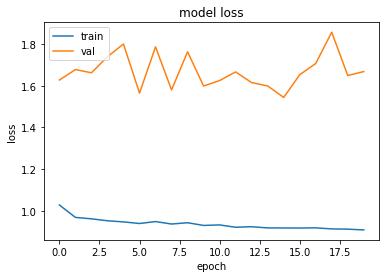

In [49]:
##################
# REPORTS
##################
import ReportsK as reports
reports.plotHistory( hist )